In [16]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import pingouin as pg
import nibabel as nii
import numpy as np 

In [66]:
df = pd.read_csv("isbi_results_individual_volume.csv")
df=df[df.columns[1:]]
df=df[~df["method"].isin(["Pair-zero-mean","Pair-aug","SyN", "DL-IRIS"])]
df=df[~df["struct"].isin(["bs","bg"])]

display(df["struct"].unique())
display(df["method"].unique())


df["dice"]=df["dice"].apply(lambda x : float(x))
df.sort_values("dice")


array(['hy', 'mb', 'hpf', 'str', 'ctx', 'gp', 'th', 'cb', 'olf'],
      dtype=object)

array(['Affine', 'SyN-Mean', 'SyN-Mask', 'DL-GIN-3fold', 'OP', 'Pair',
       'Pair-zero', 'Pair-null'], dtype=object)

,method,struct,mouse,dice,volume
270,Affine,gp,M877,0.279148,1.520640
215,Affine,gp,M866,0.286747,1.306368
237,Affine,gp,M872,0.297347,1.238976
1557,DL-GIN-3fold,gp,M672,0.297674,1.410048
204,Affine,gp,M857,0.311021,0.993600
...,...,...,...,...,...
2274,Pair,cb,M757,0.924931,60.317568
2868,Pair-zero,cb,M757,0.925720,61.596288
2065,OP,cb,M886,0.925798,62.049024
2340,Pair,cb,M875,0.927782,61.672320


In [67]:
dfMouseAvg=df.groupby(["method","struct"]).agg({"dice" : ['mean','std']})
dfMouseAvg.columns = dfMouseAvg.columns.map('_'.join).str.strip('_')

#dfMouseAvg.columns = dfMouseAvg.columns.droplevel(0)
dfMouseAvg=dfMouseAvg.reset_index()
dfMouseAvg

,method,struct,dice_mean,dice_std
0,Affine,cb,0.857671,0.033220
1,Affine,ctx,0.886794,0.014822
2,Affine,gp,0.514315,0.158307
3,Affine,hpf,0.863390,0.016957
4,Affine,hy,0.806806,0.028724
...,...,...,...,...
67,SyN-Mean,hy,0.815907,0.022458
68,SyN-Mean,mb,0.764855,0.029077
69,SyN-Mean,olf,0.678044,0.018329
70,SyN-Mean,str,0.881826,0.019911


<AxesSubplot:xlabel='struct', ylabel='dice'>

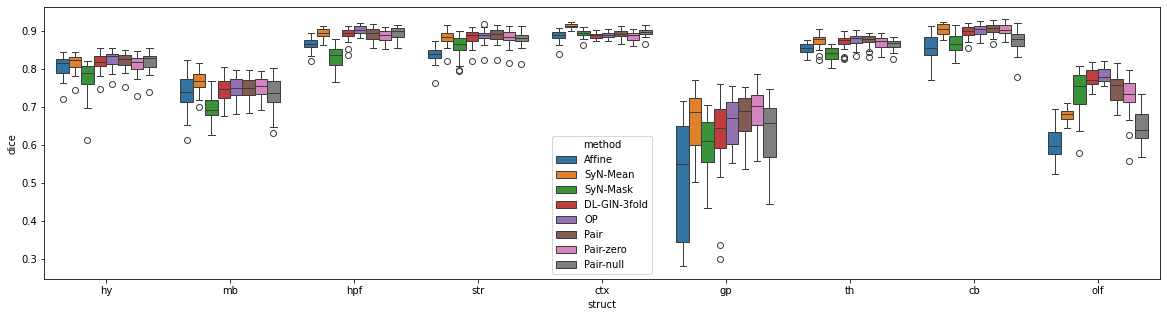

In [68]:

plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="struct",y="dice", hue="method")



In [69]:
dfpivotMean=dfMouseAvg.pivot(index='method', columns='struct',values="dice_mean")
dfpivotMean



struct,cb,ctx,gp,hpf,hy,mb,olf,str,th
method,,,,,,,,,
Affine,0.857671,0.886794,0.514315,0.863390,0.806806,0.736638,0.602230,0.839007,0.852386
DL-GIN-3fold,0.896598,0.886729,0.623884,0.891365,0.817265,0.745521,0.775468,0.882065,0.870637
OP,0.901182,0.888413,0.656310,0.902196,0.825431,0.750200,0.783603,0.887016,0.875866
Pair,0.904648,0.892719,0.677210,0.891447,0.821487,0.749937,0.747110,0.887853,0.874608
Pair-null,0.873899,0.896904,0.631544,0.895254,0.818574,0.735017,0.647591,0.879145,0.864453
Pair-zero,0.903547,0.884327,0.688786,0.886398,0.811301,0.751334,0.727987,0.882794,0.868056
SyN-Mask,0.866873,0.893902,0.597037,0.831285,0.777645,0.698365,0.736695,0.860100,0.839674
SyN-Mean,0.904800,0.913224,0.655968,0.892988,0.815907,0.764855,0.678044,0.881826,0.871954


In [70]:
dfpivotStd=dfMouseAvg.pivot(index='method', columns='struct',values="dice_std")
dfpivotStd

struct,cb,ctx,gp,hpf,hy,mb,olf,str,th
method,,,,,,,,,
Affine,0.033220,0.014822,0.158307,0.016957,0.028724,0.051031,0.044143,0.024232,0.014853
DL-GIN-3fold,0.015442,0.007059,0.109290,0.017424,0.024135,0.034249,0.024807,0.020992,0.018733
OP,0.014411,0.007897,0.065895,0.011592,0.021195,0.028250,0.019954,0.017339,0.015533
Pair,0.014901,0.011750,0.056886,0.016164,0.021359,0.026150,0.038815,0.020235,0.016704
Pair-null,0.029584,0.009769,0.090821,0.015800,0.025016,0.040464,0.046665,0.020073,0.013721
Pair-zero,0.014276,0.012978,0.056037,0.017044,0.024723,0.025951,0.053674,0.022239,0.018381
SyN-Mask,0.022374,0.010433,0.072959,0.028160,0.043976,0.033808,0.055670,0.029241,0.017234
SyN-Mean,0.014385,0.006060,0.085672,0.014117,0.022458,0.029077,0.018329,0.019911,0.018431


In [71]:
methodRanking=dfpivotMean.mean(axis=1).sort_values()
methodRanking

method
Affine          0.773249
SyN-Mask        0.789064
Pair-null       0.804709
SyN-Mean        0.819952
DL-GIN-3fold    0.821059
Pair-zero       0.822725
Pair            0.827447
OP              0.830024
dtype: float64

In [72]:
structRanking=dfpivotMean.mean(axis=0).sort_values()
structRanking

struct
gp     0.630632
olf    0.712341
mb     0.741483
hy     0.811802
th     0.864704
str    0.874976
hpf    0.881790
cb     0.888653
ctx    0.892876
dtype: float64

In [73]:
structRankingByVariance=dfpivotMean.std(axis=0).sort_values()
structRankingByVariance

struct
ctx    0.009251
th     0.012536
hy     0.014948
str    0.016910
cb     0.019311
mb     0.019754
hpf    0.023356
gp     0.055494
olf    0.063923
dtype: float64

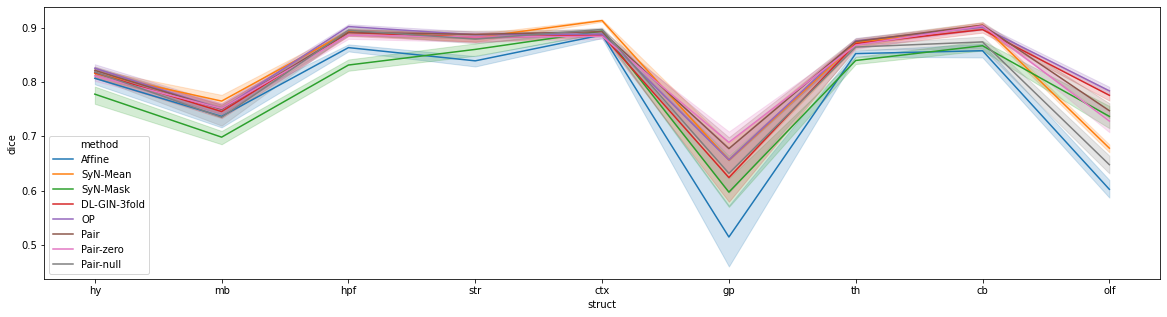

In [74]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x="struct",y="dice", hue="method")
plt.savefig("ranking.png")

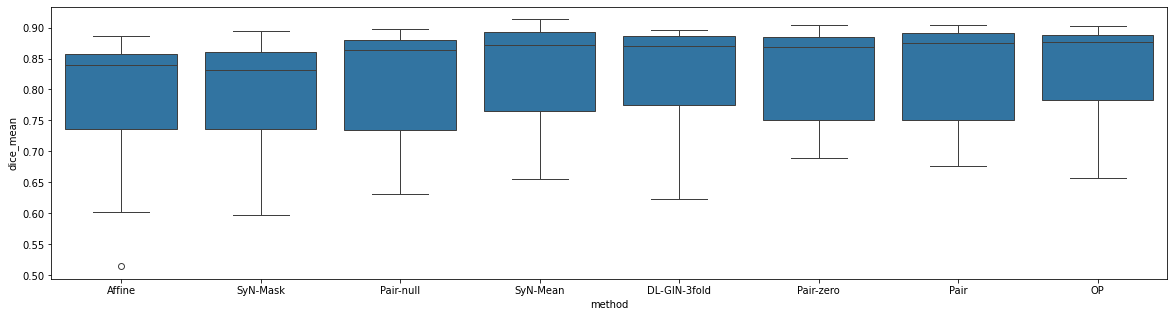

In [75]:
plt.figure(figsize=(20,5))
sns.boxplot(data=dfMouseAvg, x="method",y="dice_mean", order=methodRanking.index )
plt.savefig("ranking2.png")

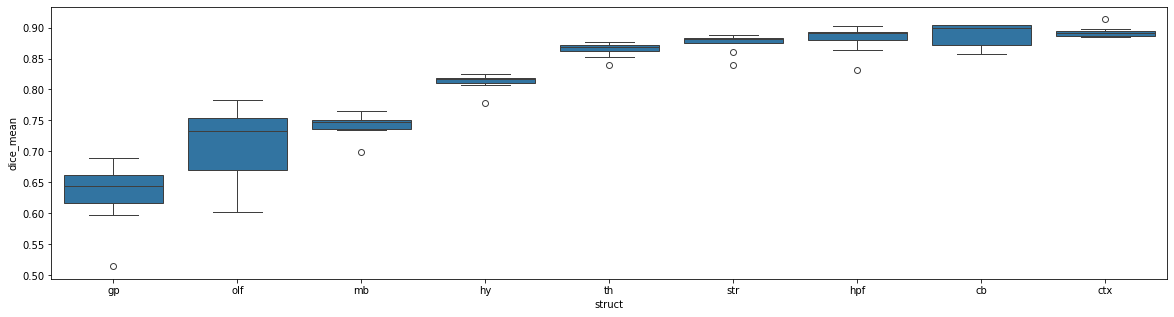

In [76]:
plt.figure(figsize=(20,5))
sns.boxplot(data=dfMouseAvg, x="struct",y="dice_mean", order=structRanking.index)
plt.savefig("ranking3.png")

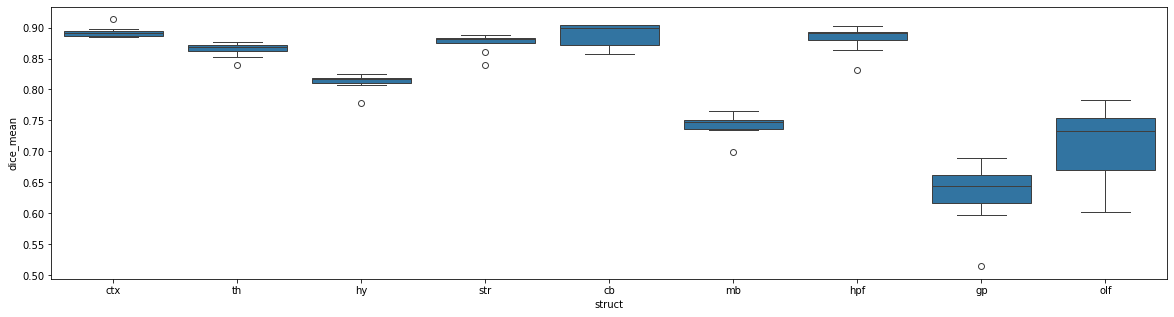

In [77]:
plt.figure(figsize=(20,5))
sns.boxplot(data=dfMouseAvg, x="struct",y="dice_mean", order=structRankingByVariance.index)
plt.savefig("ranking3bis.png")

gp : petite structure / peu contrasté => difficile à segmenter

olf : sensible au fied of view => grand variabilité morpho / pb de crop

mb : structure peu contrasté / mal définiee ?

hy : inferior : pb RSN / biais / variabilté FOV / decoupe

ctx / str / hpf / cb / th

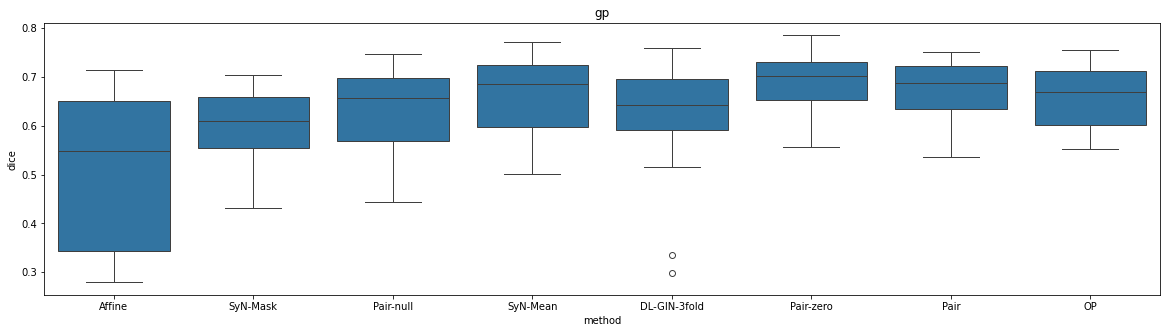

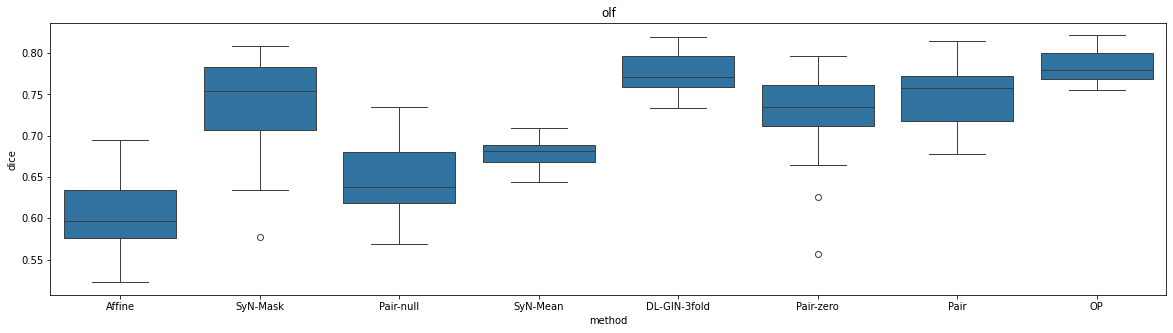

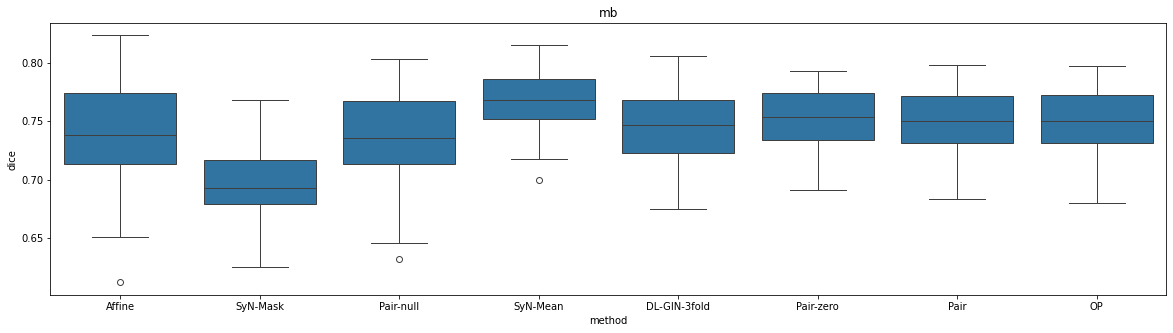

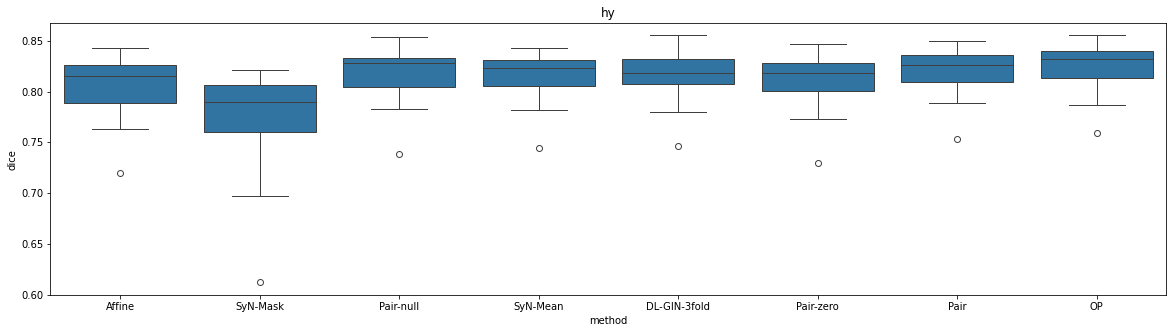

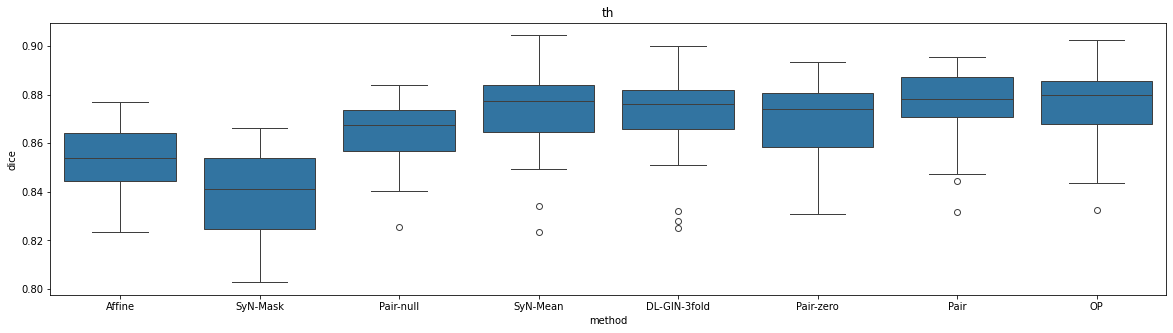

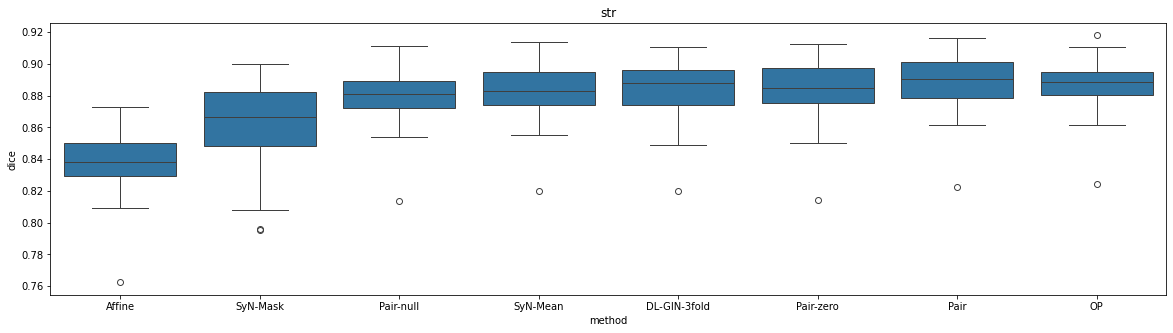

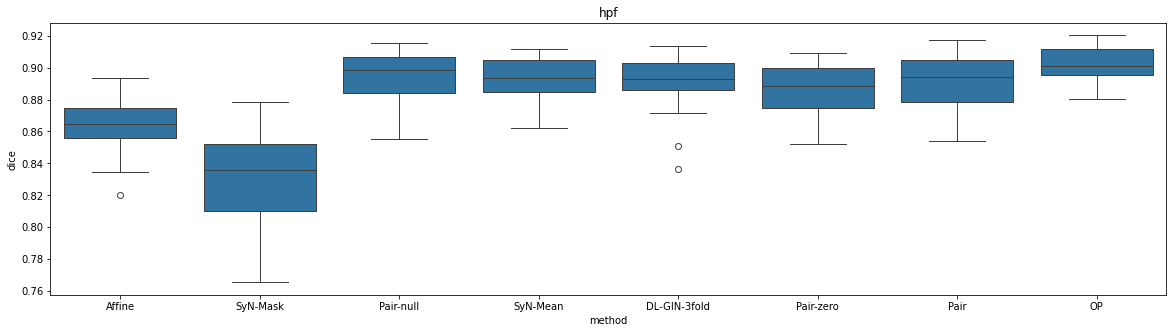

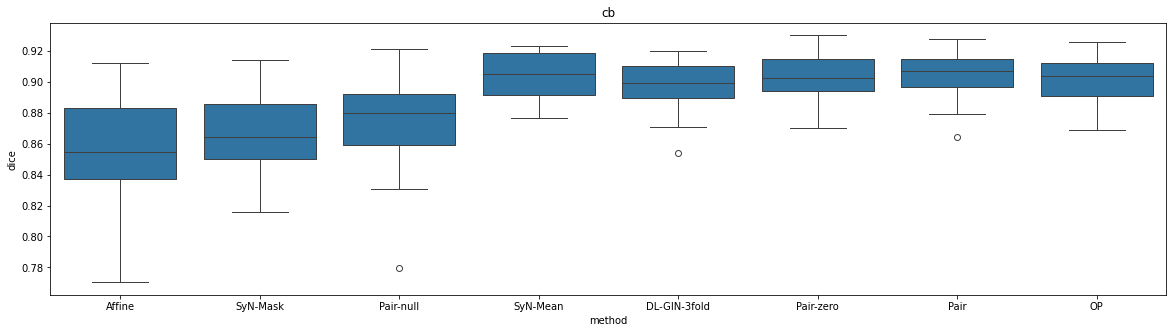

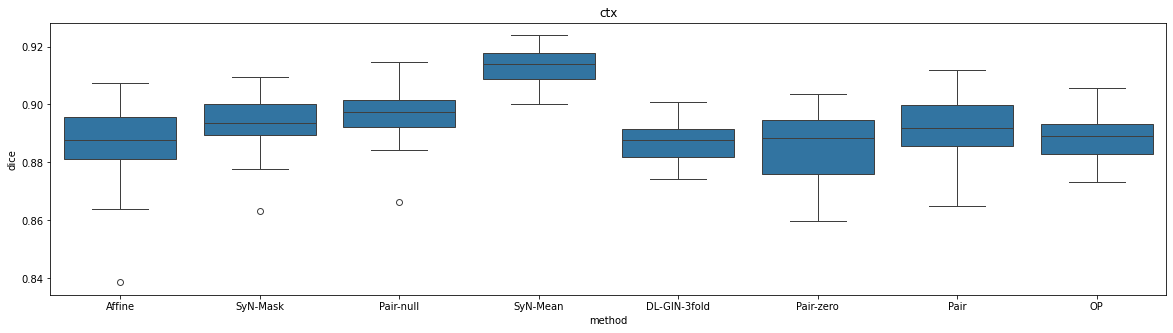

In [78]:
for item in structRanking.index :
    plt.figure(figsize=(20,5))
    sns.boxplot(data=df[df["struct"]==item], x="method",y="dice", order=methodRanking.index )
    plt.title(item)
    plt.show()

In [79]:
from statannotations.Annotator import Annotator
for item in structRanking.index :
    plt.figure(figsize=(20,5))
    ax=sns.boxplot(data=df[df["struct"]==item], x="method",y="dice", order=methodRanking.index )
    plt.title(item)
    pairs=[("Pair","OP"),("Pair","Pair-zero"),('DL-GIN-3fold','DL-IRIS'),('DL-GIN-3fold','OP'),("Pair-null","Pair-zero"),("Pair-null","SyN-Mean"),("OP","SyN-Mean")]
    annotator = Annotator(ax, pairs, data=df[df["struct"]==item], x="method",y="dice", order=methodRanking.index.tolist() )
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()

ModuleNotFoundError: No module named 'statannotations'

In [80]:
.tolist()

SyntaxError: invalid syntax (1670580818.py, line 1)

In [81]:
methodRanking.index.tolist()

['Affine',
 'SyN-Mask',
 'Pair-null',
 'SyN-Mean',
 'DL-GIN-3fold',
 'Pair-zero',
 'Pair',
 'OP']

In [82]:
df.pivot(index='method', columns=['mouse',"struct"],values="dice").T.ptests(paired=True)


method,Affine,DL-GIN-3fold,OP,Pair,Pair-null,Pair-zero,SyN-Mask,SyN-Mean
method,,,,,,,,
Affine,-,***,***,***,***,***,***,***
DL-GIN-3fold,-10.808,-,***,*,***,,***,
OP,-12.03,-5.155,-,,***,***,***,***
Pair,-11.0,-2.409,1.722,-,***,***,***,**
Pair-null,-10.654,4.819,8.46,8.369,-,***,***,***
Pair-zero,-10.127,-0.565,3.749,4.304,-6.816,-,***,
SyN-Mask,-3.356,11.298,17.779,15.215,4.778,12.348,-,***
SyN-Mean,-13.12,0.361,4.061,3.278,-9.373,1.267,-10.573,-


In [83]:
for item in df["struct"].unique() :
    print(item)
    display(df[df["struct"]==item].pivot(index='method', columns=['mouse',"struct"],values="dice").T.ptests(paired=True))


hy


method,Affine,DL-GIN-3fold,OP,Pair,Pair-null,Pair-zero,SyN-Mask,SyN-Mean
method,,,,,,,,
Affine,-,***,***,***,***,,***,***
DL-GIN-3fold,-4.375,-,**,,,*,***,
OP,-7.355,-3.614,-,**,**,***,***,***
Pair,-6.004,-1.965,3.624,-,,***,***,***
Pair-null,-7.172,-0.809,3.44,1.565,-,**,***,
Pair-zero,-1.937,2.329,10.026,7.461,3.525,-,***,**
SyN-Mask,4.969,5.779,7.406,6.829,6.543,5.744,-,***
SyN-Mean,-3.736,0.563,7.555,4.522,1.354,-3.271,-6.348,-


mb


method,Affine,DL-GIN-3fold,OP,Pair,Pair-null,Pair-zero,SyN-Mask,SyN-Mean
method,,,,,,,,
Affine,-,,,,,,***,**
DL-GIN-3fold,-1.131,-,,,*,,***,***
OP,-1.652,-1.985,-,,**,,***,***
Pair,-1.615,-1.257,0.114,-,**,,***,***
Pair-null,0.344,2.435,3.144,3.035,-,**,***,***
Pair-zero,-1.867,-1.566,-0.47,-0.611,-3.093,-,***,***
SyN-Mask,4.632,8.849,12.581,13.012,6.111,14.147,-,***
SyN-Mean,-3.39,-8.053,-6.774,-4.857,-6.187,-4.267,-13.739,-


hpf


method,Affine,DL-GIN-3fold,OP,Pair,Pair-null,Pair-zero,SyN-Mask,SyN-Mean
method,,,,,,,,
Affine,-,***,***,***,***,***,***,***
DL-GIN-3fold,-8.305,-,***,,,,***,
OP,-15.061,-4.128,-,***,***,***,***,***
Pair,-11.783,-0.024,7.422,-,***,***,***,
Pair-null,-15.178,-1.138,4.833,-3.798,-,***,***,
Pair-zero,-8.713,1.419,10.608,4.979,8.84,-,***,***
SyN-Mask,6.386,10.261,14.622,14.262,14.661,12.037,-,***
SyN-Mean,-10.332,-0.463,7.368,-1.036,1.777,-4.484,-14.291,-


str


method,Affine,DL-GIN-3fold,OP,Pair,Pair-null,Pair-zero,SyN-Mask,SyN-Mean
method,,,,,,,,
Affine,-,***,***,***,***,***,***,***
DL-GIN-3fold,-10.878,-,,,,,***,
OP,-13.315,-1.843,-,,***,*,***,**
Pair,-11.478,-1.482,-0.531,-,***,**,***,***
Pair-null,-12.466,0.846,5.232,5.71,-,*,***,
Pair-zero,-10.536,-0.182,2.095,3.581,-2.308,-,***,
SyN-Mask,-3.928,4.132,6.958,7.572,5.6,6.148,-,***
SyN-Mean,-10.196,0.062,3.435,6.185,-1.851,0.696,-6.387,-


ctx


method,Affine,DL-GIN-3fold,OP,Pair,Pair-null,Pair-zero,SyN-Mask,SyN-Mean
method,,,,,,,,
Affine,-,,,**,***,,***,***
DL-GIN-3fold,0.032,-,,***,***,,***,***
OP,-0.804,-1.989,-,**,***,*,***,***
Pair,-3.427,-3.769,-3.193,-,**,***,,***
Pair-null,-7.746,-8.234,-7.009,-3.563,-,***,*,***
Pair-zero,1.07,1.158,2.073,4.761,6.394,-,***,***
SyN-Mask,-4.118,-4.175,-3.906,-0.726,2.156,-4.553,-,***
SyN-Mean,-12.476,-32.16,-30.526,-12.108,-13.873,-12.76,-13.05,-


gp


method,Affine,DL-GIN-3fold,OP,Pair,Pair-null,Pair-zero,SyN-Mask,SyN-Mean
method,,,,,,,,
Affine,-,***,***,***,***,***,**,***
DL-GIN-3fold,-5.018,-,*,*,,**,,
OP,-6.265,-2.386,-,*,*,***,***,
Pair,-5.642,-2.739,-2.493,-,**,*,***,
Pair-null,-6.921,-0.448,2.71,3.096,-,***,***,***
Pair-zero,-6.629,-3.439,-4.4,-2.284,-4.719,-,***,**
SyN-Mask,-3.557,1.555,7.405,7.099,3.756,9.421,-,***
SyN-Mean,-7.378,-1.943,0.044,1.62,-3.781,3.082,-9.027,-


th


method,Affine,DL-GIN-3fold,OP,Pair,Pair-null,Pair-zero,SyN-Mask,SyN-Mean
method,,,,,,,,
Affine,-,***,***,***,***,***,**,***
DL-GIN-3fold,-6.569,-,,,*,,***,
OP,-9.307,-1.732,-,,***,***,***,***
Pair,-9.056,-1.291,1.43,-,***,***,***,*
Pair-null,-7.37,2.754,8.671,7.127,-,*,***,***
Pair-zero,-6.533,0.963,4.613,4.96,-2.187,-,***,*
SyN-Mask,3.476,7.192,11.295,10.304,7.222,8.022,-,***
SyN-Mean,-6.596,-0.393,3.856,2.327,-4.123,-2.438,-9.515,-


cb


method,Affine,DL-GIN-3fold,OP,Pair,Pair-null,Pair-zero,SyN-Mask,SyN-Mean
method,,,,,,,,
Affine,-,***,***,***,***,***,*,***
DL-GIN-3fold,-8.635,-,**,***,***,***,***,***
OP,-9.256,-3.696,-,*,***,,***,**
Pair,-10.865,-4.877,-2.609,-,***,,***,
Pair-null,-10.327,5.794,6.493,8.326,-,***,*,***
Pair-zero,-10.288,-3.86,-1.696,1.59,-7.581,-,***,
SyN-Mask,-2.745,10.323,12.072,15.316,2.198,14.049,-,***
SyN-Mean,-10.905,-5.297,-3.124,-0.136,-7.889,-1.08,-17.199,-


olf


method,Affine,DL-GIN-3fold,OP,Pair,Pair-null,Pair-zero,SyN-Mask,SyN-Mean
method,,,,,,,,
Affine,-,***,***,***,***,***,***,***
DL-GIN-3fold,-30.892,-,**,***,***,***,***,***
OP,-28.57,-3.175,-,***,***,***,***,***
Pair,-31.331,6.637,6.678,-,***,**,,***
Pair-null,-18.882,21.265,19.322,23.917,-,***,***,***
Pair-zero,-16.41,6.32,6.303,3.114,-10.187,-,,***
SyN-Mask,-13.055,3.905,4.376,0.999,-8.726,-0.822,-,***
SyN-Mean,-10.039,24.247,38.465,11.264,-3.732,5.391,5.194,-


In [84]:
post_hocs = pg.pairwise_tests(dv='dice_mean', within='method',subject="struct", data=dfMouseAvg,padjust="fdr_bh")
post_hocs[post_hocs["p-corr"]>0.05].sort_values("p-unc")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
6,method,Affine,SyN-Mean,True,True,-3.465878,8.0,two-sided,0.008494,0.059458,fdr_bh,7.24,-0.383403
24,method,Pair-null,SyN-Mean,True,True,-3.213414,8.0,two-sided,0.012361,0.059959,fdr_bh,5.376,-0.141601
25,method,Pair-zero,SyN-Mask,True,True,3.187667,8.0,two-sided,0.012848,0.059959,fdr_bh,5.214,0.360406
7,method,DL-GIN-3fold,OP,True,True,-2.926103,8.0,two-sided,0.019112,0.076447,fdr_bh,3.818,-0.096377
2,method,Affine,Pair,True,True,-2.778803,8.0,two-sided,0.023969,0.078755,fdr_bh,3.201,-0.470279
1,method,Affine,OP,True,True,-2.743447,8.0,two-sided,0.025314,0.078755,fdr_bh,3.069,-0.489484
3,method,Affine,Pair-null,True,True,-2.646965,8.0,two-sided,0.029394,0.082303,fdr_bh,2.735,-0.251101
0,method,Affine,DL-GIN-3fold,True,True,-2.510299,8.0,two-sided,0.036354,0.085452,fdr_bh,2.324,-0.401965
27,method,SyN-Mask,SyN-Mean,True,True,-2.460752,8.0,two-sided,0.039273,0.085452,fdr_bh,2.191,-0.301557
4,method,Affine,Pair-zero,True,True,-2.454227,8.0,two-sided,0.039674,0.085452,fdr_bh,2.174,-0.432775


In [85]:
post_hocs = pg.pairwise_tests(dv='dice', between='method', data=df,padjust="fdr_bh")
post_hocs[post_hocs["p-corr"]>0.05].sort_values("p-unc")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
22,method,Pair-null,Pair-zero,False,True,-2.070284,484.0,two-sided,0.038955,0.077911,fdr_bh,0.802,-0.187529
9,method,DL-GIN-3fold,Pair-null,False,True,1.763509,484.0,two-sided,0.078446,0.146432,fdr_bh,0.455,0.159741
23,method,Pair-null,SyN-Mask,False,True,1.665330,484.0,two-sided,0.096494,0.168864,fdr_bh,0.386,0.150848
24,method,Pair-null,SyN-Mean,False,True,-1.623651,484.0,two-sided,0.105101,0.173108,fdr_bh,0.362,-0.147072
5,method,Affine,SyN-Mask,False,True,-1.455729,484.0,two-sided,0.146116,0.227291,fdr_bh,0.282,-0.131862
17,method,OP,SyN-Mean,False,True,1.205285,484.0,two-sided,0.228682,0.337005,fdr_bh,0.204,0.109176
7,method,DL-GIN-3fold,OP,False,True,-1.089878,484.0,two-sided,0.276309,0.386833,fdr_bh,0.179,-0.098722
15,method,OP,Pair-zero,False,True,0.963068,484.0,two-sided,0.335994,0.447992,fdr_bh,0.158,0.087236
21,method,Pair,SyN-Mean,False,True,0.903547,484.0,two-sided,0.366685,0.466690,fdr_bh,0.15,0.081844
8,method,DL-GIN-3fold,Pair,False,True,-0.782511,484.0,two-sided,0.434297,0.528710,fdr_bh,0.136,-0.070881
